<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [46]:
# pip install ydata_profiling
# pip install scikit-learn
# !pip install --upgrade ydata-sdk
# !pip install ipywidgets
# !pip install jupyterlab
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !pip install --upgrade pandas
# !pip install --upgrade ydata-profiling

In [47]:
%matplotlib inline

In [48]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from ipywidgets import widgets

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [49]:
df_final= pd.read_csv('fichier_final.csv',delimiter=',')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du fichier</h2>
</div>

In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Zone                                   236 non-null    object 
 1   Variation_population                   236 non-null    float64
 2   Disponibilité intérieure               236 non-null    float64
 3   Exportations - Quantité                236 non-null    float64
 4   Importations - Quantité                236 non-null    float64
 5   Nourriture                             236 non-null    float64
 6   Production                             236 non-null    float64
 7   PIB                                    236 non-null    float64
 8   IDH                                    236 non-null    float64
 9   Stabilité politique                    236 non-null    object 
 10  Logistics quality and competence rank  236 non-null    float64
 11  Tracki

In [51]:
#Convertir les colonnes en tonnes en kg
df_final[['Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Production']]*=1000
df_final.head()

,Zone,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Stabilité politique,Logistics quality and competence rank,Tracking and tracing rank
0,Afghanistan,2.41,57000.0,0.0,29000.0,55000.0,28000.0,2956.8,0.496,Très instable,158.0,159.0
1,Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.000,Instable,39.0,35.0
2,Albanie,-0.05,47000.0,0.0,38000.0,47000.0,13000.0,14229.3,0.000,Moyenne,92.0,95.0
3,Algérie,2.03,277000.0,0.0,2000.0,264000.0,275000.0,13805.4,0.000,Très instable,113.0,103.0
4,Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.000,Stable,1.0,2.0


In [52]:
df_final.describe()

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
count,236.000000,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,236.000000,236.000000,236.000000,236.000000
mean,1.174237,4.953008e+05,7.561441e+04,6.449153e+04,4.732966e+05,5.162373e+05,19276.696186,0.169911,42.682203,42.292373
std,1.202109,1.880398e+06,3.934684e+05,1.633427e+05,1.835791e+06,2.134244e+06,24737.860665,0.300041,52.425313,52.094792
min,-3.920000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.365000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2119.850000,0.000000,0.000000,0.000000
50%,1.050000,4.100000e+04,0.000000e+00,5.000000e+03,4.100000e+04,2.000000e+04,9778.350000,0.000000,9.500000,10.500000
75%,1.947500,2.027500e+05,4.000000e+03,4.050000e+04,1.975000e+05,1.687500e+05,28241.075000,0.392000,86.250000,80.500000
max,5.410000,1.826600e+07,4.223000e+06,1.069000e+06,1.810000e+07,2.191400e+07,135547.000000,0.935000,160.000000,160.000000


In [53]:
df_final.set_index('Zone',inplace=True)
df_final

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Stabilité politique,Logistics quality and competence rank,Tracking and tracing rank
Zone,,,,,,,,,,,
Afghanistan,2.41,57000.0,0.0,29000.0,55000.0,28000.0,2956.8,0.496,Très instable,158.0,159.0
Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.000,Instable,39.0,35.0
Albanie,-0.05,47000.0,0.0,38000.0,47000.0,13000.0,14229.3,0.000,Moyenne,92.0,95.0
Algérie,2.03,277000.0,0.0,2000.0,264000.0,275000.0,13805.4,0.000,Très instable,113.0,103.0
Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.000,Stable,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,2.64,3000.0,0.0,6000.0,3000.0,0.0,2896.7,0.000,Moyenne,73.0,126.0
Îles Turques-et-Caïques,1.48,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0.0,0.0
Îles Vierges américaines,-0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0.0,0.0


In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, Afghanistan to Îles Wallis-et-Futuna
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Variation_population                   236 non-null    float64
 1   Disponibilité intérieure               236 non-null    float64
 2   Exportations - Quantité                236 non-null    float64
 3   Importations - Quantité                236 non-null    float64
 4   Nourriture                             236 non-null    float64
 5   Production                             236 non-null    float64
 6   PIB                                    236 non-null    float64
 7   IDH                                    236 non-null    float64
 8   Stabilité politique                    236 non-null    object 
 9   Logistics quality and competence rank  236 non-null    float64
 10  Tracking and tracing rank              236 non-null

In [55]:
# Création d'un df pour appliquer le standard scaler sur les colonnes numérique
df_acp= df_final.select_dtypes(include=['float64']).copy()
df_acp.head()

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
Zone,,,,,,,,,,
Afghanistan,2.41,57000.0,0.0,29000.0,55000.0,28000.0,2956.8,0.496,158.0,159.0
Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.000,39.0,35.0
Albanie,-0.05,47000.0,0.0,38000.0,47000.0,13000.0,14229.3,0.000,92.0,95.0
Algérie,2.03,277000.0,0.0,2000.0,264000.0,275000.0,13805.4,0.000,113.0,103.0
Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.000,1.0,2.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Standarisation des données</h2>
</div>

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_acp)
df_scaled = pd.DataFrame(X_scaled, columns=df_acp.columns)
print("Ci dessous nous avons les données standardisées :")
df_scaled.head()

Ci dessous nous avons les données standardisées :


,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
0,1.030181,-0.233585,-0.192582,-0.217744,-0.228341,-0.229250,-0.661115,1.089125,2.204334,2.245055
1,0.163196,0.864789,-0.032128,2.757784,0.852506,0.540336,-0.180394,-0.567497,-0.070386,-0.140280
2,-1.020573,-0.238914,-0.192582,-0.162528,-0.232708,-0.236293,-0.204469,-0.567497,0.942724,1.013914
3,0.713398,-0.116340,-0.192582,-0.383392,-0.114251,-0.113272,-0.221641,-0.567497,1.344146,1.167807
4,-0.512053,0.662808,1.452716,4.770100,0.619960,0.468495,1.713033,-0.567497,-0.796768,-0.775087


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Identification du nombre optimal par la méthode coude</h3>
</div>

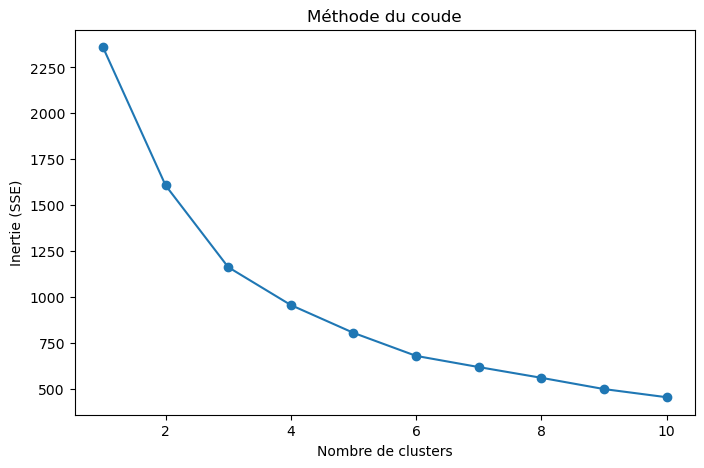

In [57]:
k_range = range(1, 11)
inertie = [
    KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_scaled).inertia_
    for k in k_range
]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(k_range), inertie, marker='o')
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Inertie (SSE)")
ax.set_title("Méthode du coude")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Identification du nombre optimal par la méthode silhouette</h3>
</div>

Pour k = 2, le score silhouette est : 0.799
Pour k = 3, le score silhouette est : 0.325
Pour k = 4, le score silhouette est : 0.357
Pour k = 5, le score silhouette est : 0.356
Pour k = 6, le score silhouette est : 0.361
Pour k = 7, le score silhouette est : 0.354
Pour k = 8, le score silhouette est : 0.347
Pour k = 9, le score silhouette est : 0.350
Pour k = 10, le score silhouette est : 0.348


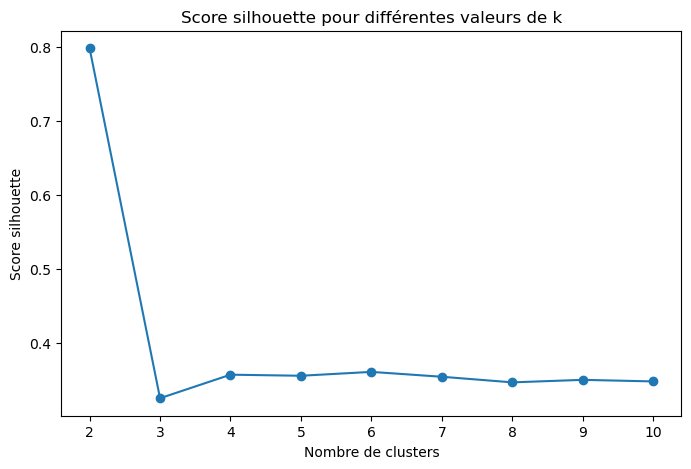

In [58]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init spécifié
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - KMeans avec le Nombre de Clusters</h3>
</div>

In [59]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
km_cluster = kmeans.fit_predict(df_scaled)

df_acp["Cluster_KM"] = km_cluster

print("Le nombre de clusters avec KMeans est :")
print(df_acp["Cluster_KM"].value_counts())

Le nombre de clusters avec KMeans est :
Cluster_KM
0    233
1      3
Name: count, dtype: int64


In [60]:
km_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
df_acp.groupby('Cluster_KM').mean()

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
Cluster_KM,,,,,,,,,,
0,1.181288,3.024979e+05,4.014592e+04,62841.201717,2.836824e+05,2.896180e+05,19096.945064,0.172099,43.034335,42.618026
1,0.626667,1.546967e+07,2.830333e+06,192666.666667,1.520000e+07,1.811700e+07,33237.366667,0.000000,15.333333,17.000000


In [63]:
df_acp[df_acp['Cluster_KM']==1]

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank,Cluster_KM
Zone,,,,,,,,,,,
Brésil,0.79,9982000.0,4223000.0,3000.0,9982000.0,14201000.0,17145.3,0.0,46.0,51.0,1
"Chine, continentale",0.47,18161000.0,576000.0,452000.0,17518000.0,18236000.0,16461.1,0.0,0.0,0.0,1
États-Unis d'Amérique,0.62,18266000.0,3692000.0,123000.0,18100000.0,21914000.0,66105.7,0.0,0.0,0.0,1


Le premier clustering est un peu biaisé par ces pays qui constituent des outliers. Ils ont une plus grande disponibilité intérieure et un PIB plus élevé. Grâce à leur production, ils sont en mesure de faire des exportations en quantité sur les excédents. Ils peuvent aussi faire des importations en raison de la forte variation de leur population.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Standarisation des données (sans les outliers)</h3>
</div>

In [65]:
df_acp_out=df_acp[~df_acp.index.isin(["Brésil", "Chine, continentale", "États-Unis d'Amérique"])].drop('Cluster_KM',axis=1)

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_acp_out)
df_scaled_out = pd.DataFrame(X_scaled, columns=df_acp_out.columns)
print("Ci dessous nous avons les données standardisées :")
df_scaled_out.head()

Ci dessous nous avons les données standardisées :


,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
0,1.019217,-0.366751,-0.259897,-0.208945,-0.363998,-0.400685,-0.654722,1.077156,2.189844,2.230958
1,0.156537,2.712188,0.147953,2.785582,2.787603,2.109548,-0.173347,-0.572326,-0.076845,-0.146032
2,-1.021353,-0.381690,-0.259897,-0.153377,-0.376732,-0.423658,-0.197455,-0.572326,0.932688,1.004124
3,0.704007,-0.038091,-0.259897,-0.375651,-0.031329,-0.022388,-0.214650,-0.572326,1.332692,1.157478
4,-0.515358,2.145998,3.922176,4.810746,2.109531,1.875219,1.722651,-0.572326,-0.800662,-0.778618


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Identification du nombre optimal par la méthode coude</h3>
</div>

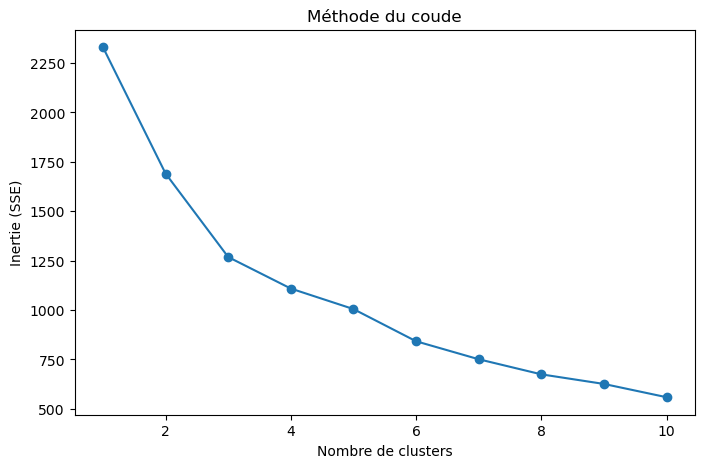

In [67]:
k_range = range(1, 11)
inertie = [
    KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_scaled_out).inertia_
    for k in k_range
]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(k_range), inertie, marker='o')
ax.set_xlabel("Nombre de clusters")
ax.set_ylabel("Inertie (SSE)")
ax.set_title("Méthode du coude")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.6 - Identification du nombre optimal par la méthode silhouette</h3>
</div>

Pour k = 2, le score silhouette est : 0.476
Pour k = 3, le score silhouette est : 0.337
Pour k = 4, le score silhouette est : 0.347
Pour k = 5, le score silhouette est : 0.338
Pour k = 6, le score silhouette est : 0.349
Pour k = 7, le score silhouette est : 0.361
Pour k = 8, le score silhouette est : 0.354
Pour k = 9, le score silhouette est : 0.361
Pour k = 10, le score silhouette est : 0.358


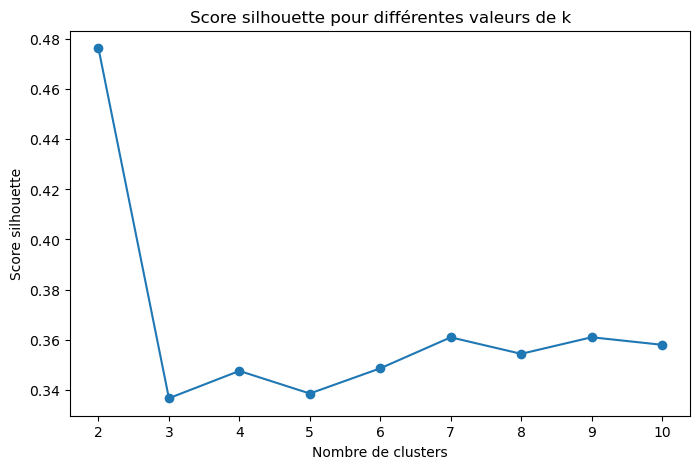

In [68]:
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init spécifié
    labels = km.fit_predict(df_scaled_out)
    score = silhouette_score(df_scaled_out, labels)
    silhouette_scores.append(score)
    print(f"Pour k = {k}, le score silhouette est : {score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score silhouette")
plt.title("Score silhouette pour différentes valeurs de k")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.7 - KMeans avec le Nombre de Clusters</h3>
</div>

In [69]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
km_cluster = kmeans.fit_predict(df_scaled_out)

df_acp_out["Cluster_KM"] = km_cluster

print("Le nombre de clusters avec KMeans est :")
print(df_acp_out["Cluster_KM"].value_counts())

Le nombre de clusters avec KMeans est :
Cluster_KM
0    204
1     29
Name: count, dtype: int64


In [71]:
df_acp_out[df_acp_out['Cluster_KM']==1]

,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank,Cluster_KM
Zone,,,,,,,,,,,
Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.000,39.0,35.0,1
Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.000,1.0,2.0,1
Arabie saoudite,1.82,1435000.0,10000.0,722000.0,1435000.0,616000.0,48554.4,0.000,57.0,46.0,1
Argentine,0.97,1962000.0,207000.0,8000.0,1856000.0,2161000.0,28499.0,0.000,68.0,58.0,1
Australie,1.28,1171000.0,42000.0,16000.0,1171000.0,1269000.0,56028.4,0.000,21.0,20.0,1
Belgique,0.55,152000.0,656000.0,338000.0,144000.0,463000.0,60044.6,0.000,2.0,9.0,1
Canada,0.93,1433000.0,163000.0,182000.0,1433000.0,1417000.0,55589.8,0.935,14.0,21.0,1
Chine - RAS de Hong-Kong,0.90,280000.0,663000.0,907000.0,391000.0,24000.0,65662.7,0.000,0.0,0.0,1
Colombie,1.54,1643000.0,2000.0,78000.0,1565000.0,1564000.0,17195.1,0.000,56.0,53.0,1


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.7 - Caractérisation des clusters avec une analyse bivariée entre les variables et les clusters (boxplot)</h3>
</div>

Ci dessous le boxplot sur l'ensemble des valeurs avec le subplots

In [86]:
colonnes_num = [
    "Variation_population",
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Nourriture",
    "Production",
    "PIB","IDH"
]

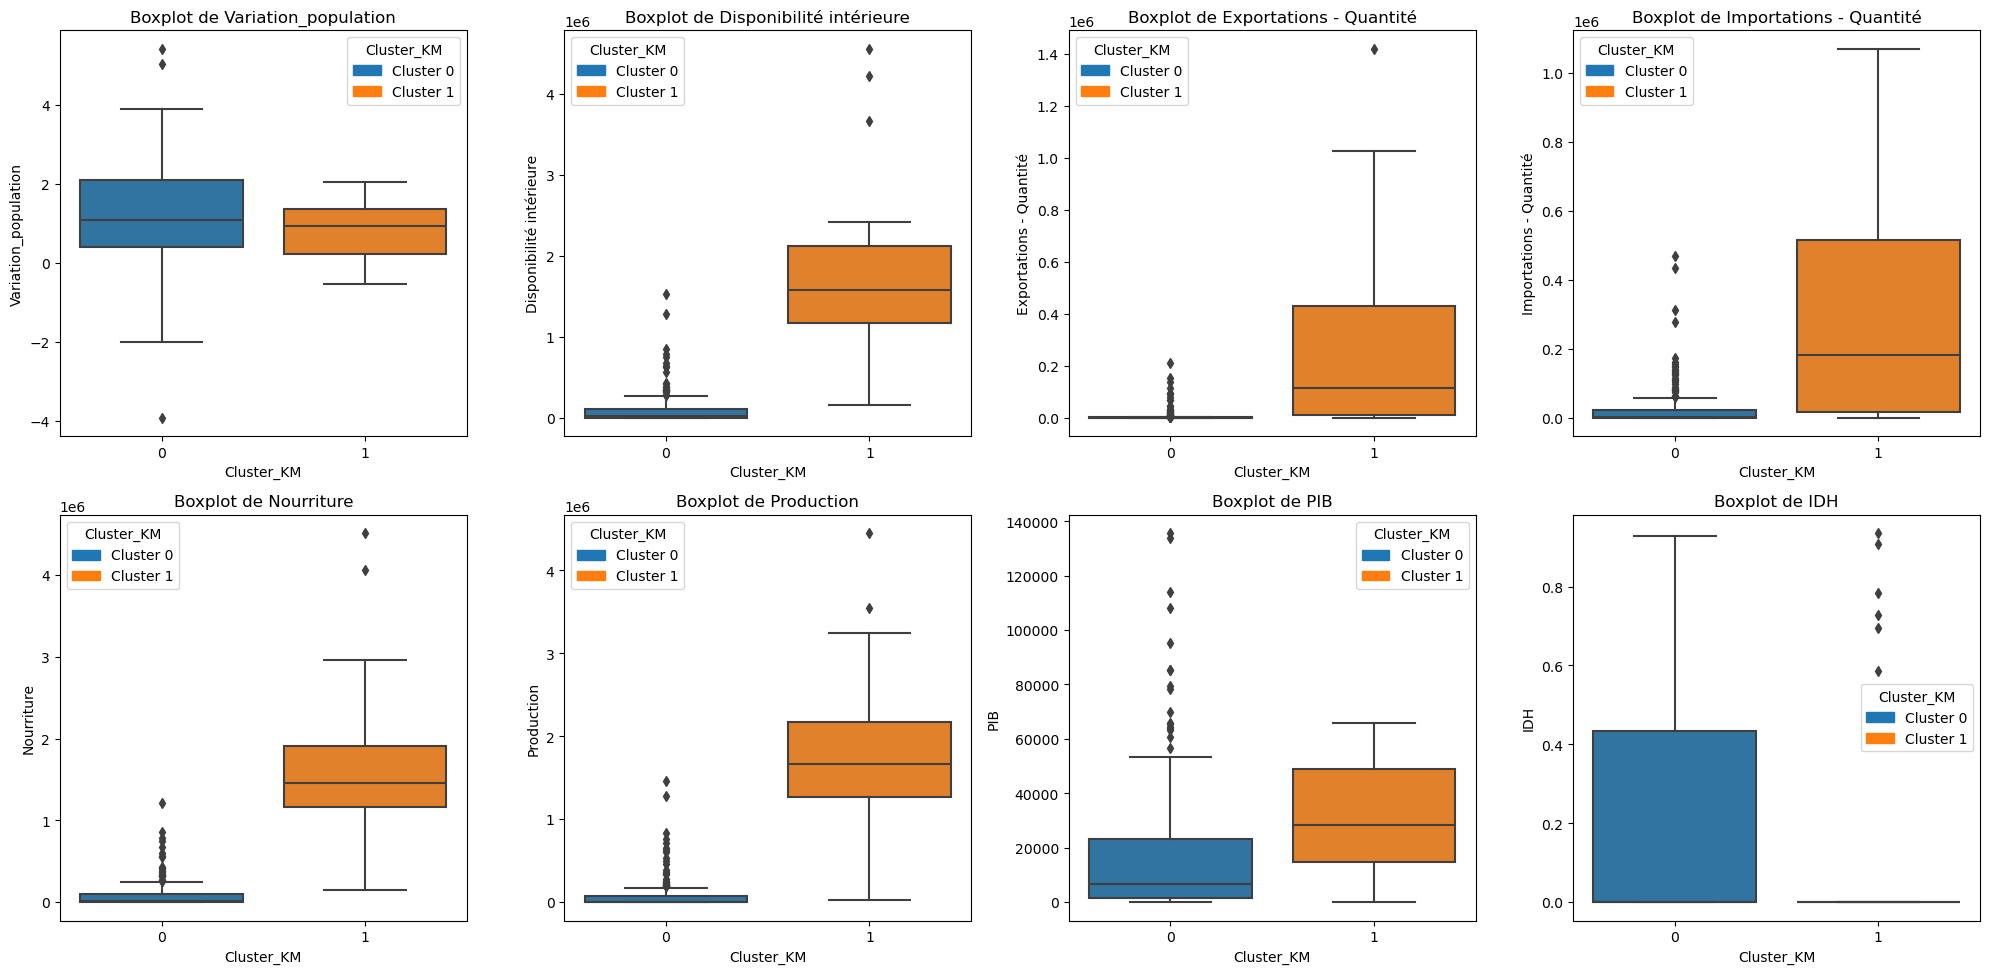

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Définir des couleurs fixes pour chaque cluster
colors = {0: "#1f77b4", 1: "#ff7f0e"}

for i, col in enumerate(colonnes_num):
    sns.boxplot(
        data=df_acp_out,
        x='Cluster_KM',
        y=col,
        palette=colors,
        ax=axes[i]
    )
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Cluster_KM')

    # Créer manuellement la légende avec les bonnes couleurs
    handles = [Patch(color=colors[c], label=f"Cluster {c}") for c in sorted(df_acp_out['Cluster_KM'].unique())]
    axes[i].legend(handles=handles, title="Cluster_KM")

plt.tight_layout()
plt.show()

# Analyses des boxplots :
+ **Variation de la population** : Nous remarquons que les pays du cluster 0 ont plus de variation de la population par rapport aux pays du cluster 1, avec un écart pas trop conséquent.
+ **Disponibilité intérieure** : Nous remarquons que les pays du cluster 1 ont plus de disponibilité intérieure par rapport aux pays du cluster 0, avec un écart conséquent.
+ **Exportations** : Nous remarquons que les pays du cluster 1 exportent plus rapport aux pays du cluster 0, avec un écart pas très conséquent.
+ **Importations** : Nous remarquons que les pays du cluster 1 importent plus par rapport aux pays du cluster 0, avec un écart pas très conséquent.
+ **Nourriture** : Nous remarquons que les pays du cluster 1 consomment plus par rapport aux pays du cluster 0, avec un écart conséquent.
+ **Production** : Nous remarquons que les pays du cluster 1 produisent plus par rapport aux pays du cluster 0, avec un écart conséquent.
+ **PIB** : Nous remarquons que les pays du cluster 1 ont un fort PIB par rapport aux pays du cluster 0.
+ **IDH** : Nous remarquons que les pays du cluster O ont plus de dévéloppement humaine par rapport aux pays du cluster 0, avec un écart pas trop conséquent.luster 1.

In [92]:
caracterisation_km = df_acp_out.groupby("Cluster_KM")[colonnes_num].mean()
print("Caractérisation des clusters (KMeans) :")
print(caracterisation_km)

Caractérisation des clusters (KMeans) :
            Variation_population  Disponibilité intérieure  \
Cluster_KM                                                   
0                       1.235196              9.961765e+04   
1                       0.802069              1.729655e+06   

            Exportations - Quantité  Importations - Quantité    Nourriture  \
Cluster_KM                                                                   
0                       7230.392157             27764.705882  9.056863e+04   
1                     271689.655172            309586.206897  1.642138e+06   

              Production           PIB       IDH  
Cluster_KM                                        
0           8.450980e+04  17329.898529  0.173828  
1           1.732448e+06  31527.203448  0.159931  


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Classification Ascendante Hiérarchique (CAH)</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Dendrogramme</h3>
</div>

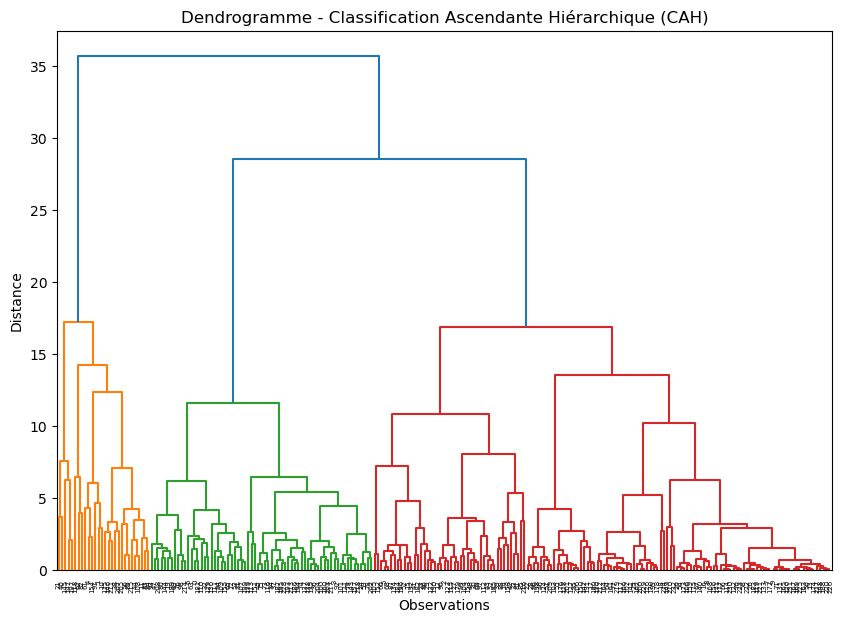

In [94]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled_out, method="ward"))
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Application de la CAH et Attribution des Clusters</h3>
</div>

In [95]:
cah = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster_labels_cah = cah.fit_predict(df_scaled_out)

df_acp_out["Cluster_CAH"] = cluster_labels_cah
print("Distribution des clusters CAH :")
print(df_acp_out["Cluster_CAH"].value_counts())

Distribution des clusters CAH :
Cluster_CAH
0    205
1     28
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Réalisation d'une Analyse en Composantes Principales (ACP) ou (PCA)</h3>
</div>

In [152]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaled_out)
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Cluster_CAH"] = df_acp_out["Cluster_CAH"].values
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.652391  3.120640  0.482440  0.200297  0.091251 -0.432625 -0.011707   
1  4.748799  1.355055 -0.870771 -0.096261  0.180425  0.584455  1.490772   
2 -0.845925  0.544734  0.356576 -1.298708 -0.510450 -0.784883  0.372847   
3 -0.722184  1.647290 -0.112274 -0.836742 -0.135169  0.405066 -0.217045   
4  6.364186 -0.274503  3.028532 -0.311996  2.052516  0.664685  1.175770   

        PC8  Cluster_CAH  
0 -0.037382            0  
1  0.066025            1  
2 -0.061990            0  
3  0.135880            0  
4  0.025145            1  


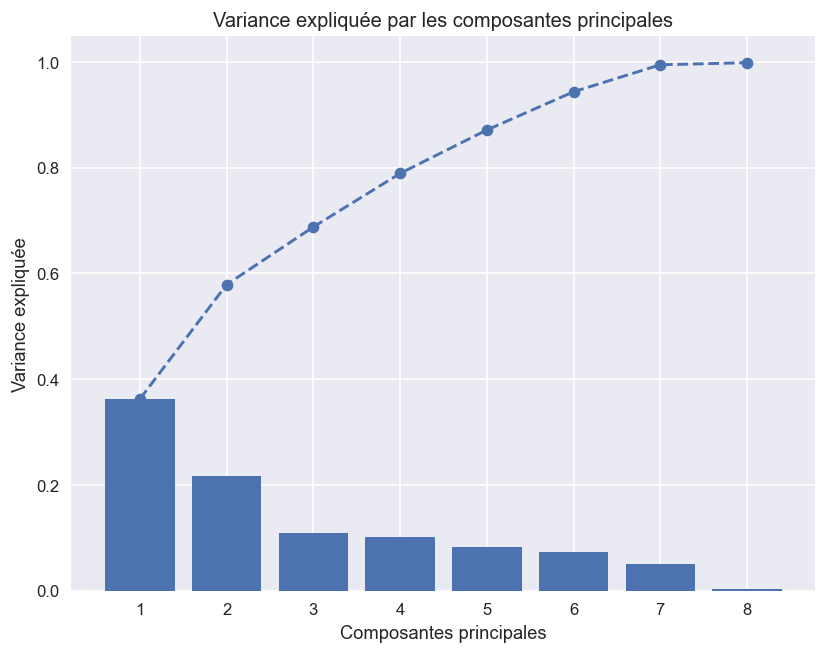

In [153]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.show()

In [154]:
coefficients = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_scaled_out.columns)

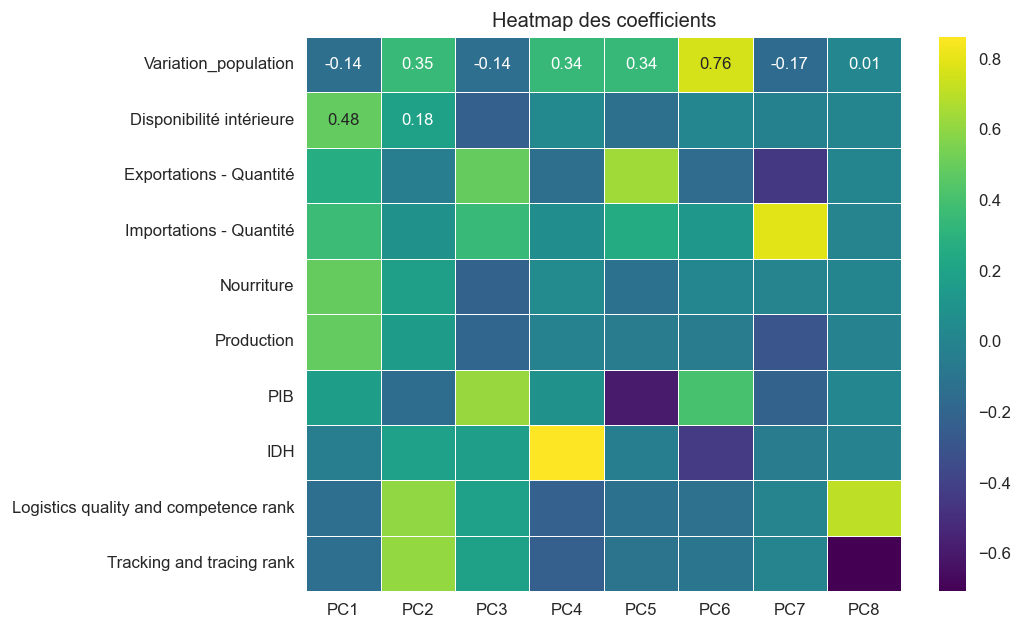

In [155]:
import matplotlib
%matplotlib inline
plt.figure(figsize=(8,6))
sns.heatmap(coefficients, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar=True)
plt.title("Heatmap des coefficients")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Le cercle de corrélation entre le composantes et les variables </h3>
</div>

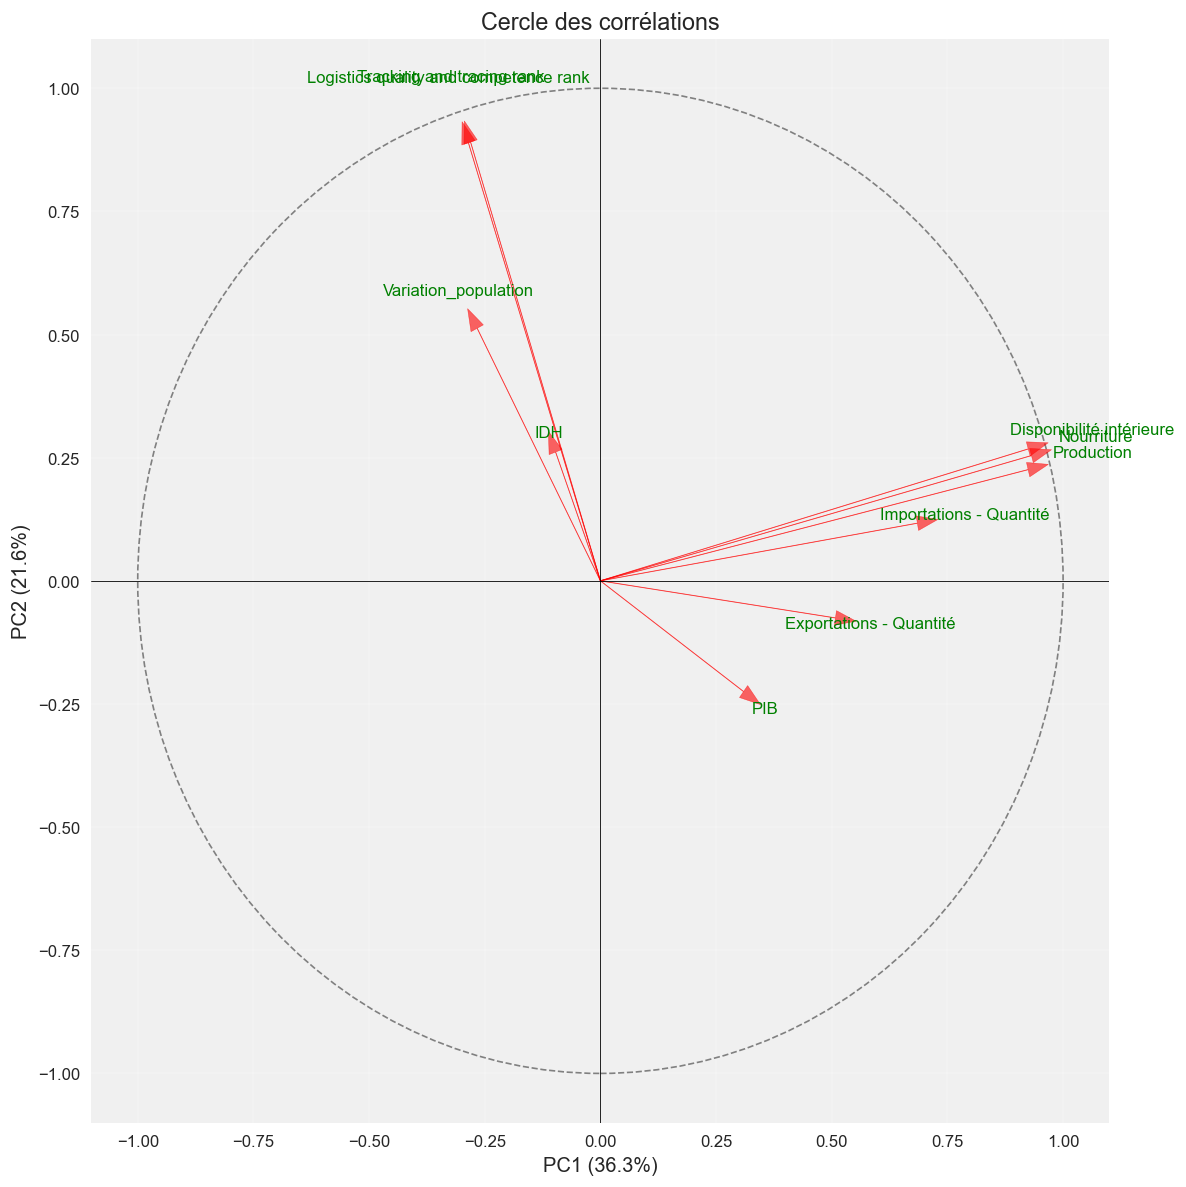

In [157]:
# Calcul des coordonnées des variables dans le plan PC1-PC2
coord_var = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10, 10))
plt.gca().set_facecolor('#f0f0f0')

# Cercle unité
cercle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(cercle)

# Affichage des flèches et noms
for i, var in enumerate(colonnes_num):
    x = coord_var[i, 0]
    y = coord_var[i, 1]
    plt.arrow(0, 0, x, y, color='red', alpha=0.6, head_width=0.03)
    plt.text(x*1.15, y*1.15, var, color='green', fontsize=10, ha='center', va='center')

# Axes et mise en forme
plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 1)}%)', fontsize=12)
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 1)}%)', fontsize=12)
plt.title('Cercle des corrélations', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

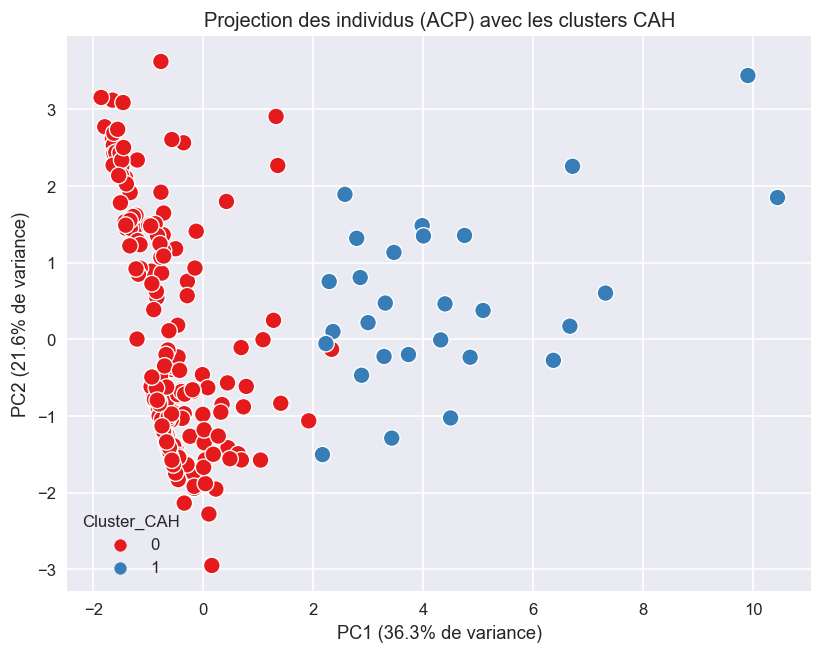

Variance expliquée par PC1 et PC2 : [0.36252501 0.21636965 0.10895067 0.10121172 0.08210083 0.07222109
 0.05106729 0.00401082]


In [158]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_CAH", palette="Set1", s=100)
plt.title("Projection des individus (ACP) avec les clusters CAH")
plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100,1)}% de variance)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100,1)}% de variance)")
plt.show()

print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)

- Préconisations de pays où d'étendre

In [159]:
moyennes_clusters = df_acp_out.groupby("Cluster_KM")[colonnes_num].mean()
print("Moyennes des variables clés par cluster (KMeans) :")
moyennes_clusters.head()

Moyennes des variables clés par cluster (KMeans) :


,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank
Cluster_KM,,,,,,,,,,
0,1.235196,9.961765e+04,7230.392157,27764.705882,9.056863e+04,8.450980e+04,17329.898529,0.173828,45.764706,45.377451
1,0.802069,1.729655e+06,271689.655172,309586.206897,1.642138e+06,1.732448e+06,31527.203448,0.159931,23.827586,23.206897


In [160]:
somme_clusters = moyennes_clusters.sum(axis=1)
print("Somme des moyennes des variables clés par cluster :")
print(somme_clusters)

cluster_fort_potentiel = somme_clusters.idxmax()
print(f"Le cluster présentant un fort potentiel est : {cluster_fort_potentiel}")

Somme des moyennes des variables clés par cluster :
Cluster_KM
0    3.271136e+05
1    5.717092e+06
dtype: float64
Le cluster présentant un fort potentiel est : 1


In [161]:
df_acp_out.reset_index(inplace=True)

In [162]:
pays_fort_potentiel = df_acp_out[df_acp_out["Cluster_KM"] == cluster_fort_potentiel]["Zone"].unique()
print("Pays à fort potentiel recommandés")
print(f"\nNous avons un nombre total de {len(pays_fort_potentiel)} pour les pays à fort potentiel, ci dessous la liste :")
for pays in pays_fort_potentiel:
    print(pays)

Pays à fort potentiel recommandés

Nous avons un nombre total de 29 pour les pays à fort potentiel, ci dessous la liste :
Afrique du Sud
Allemagne
Arabie saoudite
Argentine
Australie
Belgique
Canada
Chine - RAS de Hong-Kong
Colombie
Espagne
France
Fédération de Russie
Inde
Indonésie
Iran (République islamique d')
Italie
Japon
Malaisie
Mexique
Myanmar
Pays-Bas
Philippines
Pologne
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Thaïlande
Turquie
Ukraine
Viet Nam
Égypte


In [169]:
df_potentiel=df_acp_out[df_acp_out['Cluster_KM']==1].copy()
df_potentiel.head()

,Zone,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank,Cluster_KM,Cluster_CAH
1,Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.0,39.0,35.0,1,1
4,Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.0,1.0,2.0,1,1
10,Arabie saoudite,1.82,1435000.0,10000.0,722000.0,1435000.0,616000.0,48554.4,0.0,57.0,46.0,1,1
11,Argentine,0.97,1962000.0,207000.0,8000.0,1856000.0,2161000.0,28499.0,0.0,68.0,58.0,1,1
14,Australie,1.28,1171000.0,42000.0,16000.0,1171000.0,1269000.0,56028.4,0.0,21.0,20.0,1,0


In [171]:
df_global= pd.read_csv('fichier_final.csv',delimiter=',')

df_potentiel_vf = df_potentiel.merge(
    df_global[['Zone', 'Stabilité politique']],
    on='Zone',
    how='left')
df_potentiel_vf.head()

,Zone,Variation_population,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,PIB,IDH,Logistics quality and competence rank,Tracking and tracing rank,Cluster_KM,Cluster_CAH,Stabilité politique
0,Afrique du Sud,1.37,2118000.0,63000.0,514000.0,2035000.0,1667000.0,14823.6,0.0,39.0,35.0,1,1,Instable
1,Allemagne,0.56,1739000.0,646000.0,842000.0,1609000.0,1514000.0,61563.6,0.0,1.0,2.0,1,1,Stable
2,Arabie saoudite,1.82,1435000.0,10000.0,722000.0,1435000.0,616000.0,48554.4,0.0,57.0,46.0,1,1,Instable
3,Argentine,0.97,1962000.0,207000.0,8000.0,1856000.0,2161000.0,28499.0,0.0,68.0,58.0,1,1,Moyenne
4,Australie,1.28,1171000.0,42000.0,16000.0,1171000.0,1269000.0,56028.4,0.0,21.0,20.0,1,0,Stable


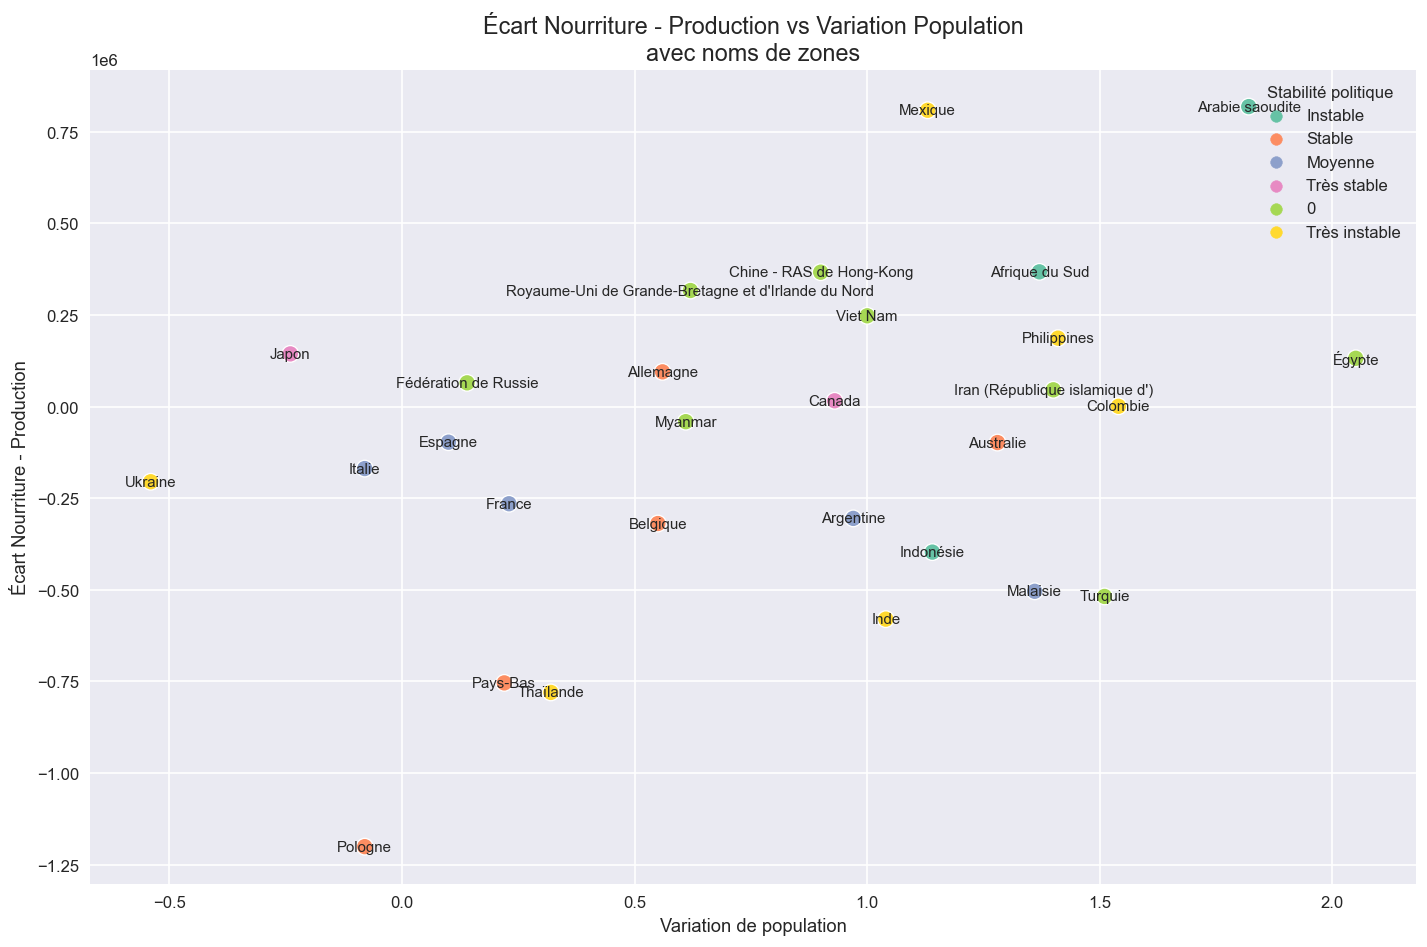

In [177]:
df_potentiel_vf['Écart_Nourriture_Production'] = df_potentiel_vf['Nourriture'] - df_potentiel_vf['Production']

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_potentiel_vf,
    x='Variation_population',
    y='Écart_Nourriture_Production',
    hue='Stabilité politique',
    palette='Set2',
    s=100
)

for i, row in df_potentiel_vf.iterrows():
    plt.text(
        row['Variation_population'],
        row['Écart_Nourriture_Production'],
        str(row['Zone']),  # ou 'Pays' si tu as une colonne pays
        fontsize=9,
        ha='center',
        va='center'
    )
plt.title("Écart Nourriture - Production vs Variation Population\navec noms de zones", fontsize=14)
plt.xlabel("Variation de population")
plt.ylabel("Écart Nourriture - Production")
plt.grid(True)
plt.tight_layout()
plt.show()